**ANN** - `Artificial Neural Network`         **Image Classification**

**CNN** - `Convolutional Neural Network`      **Train Images**

***Dataset*** - `from tensorflow "Cifar10"`

In [2]:
import numpy as np                                                      # Numerical computing: arrays, linear algebra, vectorized operations
import matplotlib.pyplot as plt                                         # Plotting and visualization of images/curves
from sklearn.metrics import confusion_matrix , classification_report    # Classification evaluation metrics
import tensorflow as tf                                                 # Deep learning framework
from tensorflow.keras import datasets, layers, models                   # Keras APIs: dataset loaders, layers, and model containers

In [3]:
(Features_train, Target_train), (Features_test, Target_test) = datasets.cifar10.load_data()             #Loading Dataset from tensorflow

In [4]:
Features_train.shape

(50000, 32, 32, 3)

In [5]:
Features_test.shape

(10000, 32, 32, 3)

In [6]:
Target_train.shape

(50000, 1)

In [7]:
Target_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
Target_train = Target_train.reshape(-1)             # Flatten labels from shape (N, 1) to (N,) for model/training APIs
Target_train[:5]                                    # Preview first five labels

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
Target_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [10]:
Target_test = Target_test.reshape(-1)               # Flatten labels from shape (N, 1) to (N,) for model/evaluation APIs
Target_test[:5]                                     # Preview first five labels

array([3, 8, 8, 0, 6], dtype=uint8)

In [11]:
Classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(Classes[y[index]])

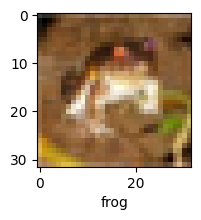

In [13]:
plot_sample(Features_train, Target_train, 0)

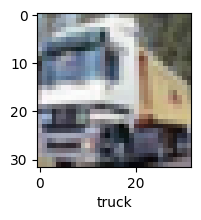

In [14]:
plot_sample(Features_train, Target_train, 1)

In [15]:
Features_train = Features_train/255.0
Features_test = Features_test/255.0

**ANN** - `Artificial Neural Network`         **Image Classification**

In [16]:
ANN = models.Sequential([                               # Define a feedforward ANN as a stack of layers
        layers.Flatten(input_shape=(32,32,3)),          # Flatten 32x32x3 image to 1D vector (3072)
        layers.Dense(3000, activation='relu'),          # Hidden layer: 3000 units with ReLU
        layers.Dense(1000, activation='relu'),          # Hidden layer: 1000 units with ReLU
        layers.Dense(10, activation='softmax')          # Output: 10 class probabilities via softmax
    ])

ANN.compile(optimizer='SGD',                            # Stochastic Gradient Descent optimizer
              loss='sparse_categorical_crossentropy',   # For integer labels (not one-hot)
              metrics=['accuracy'])                     # Report accuracy during training

ANN.fit(Features_train, Target_train, epochs=5)         # Train the ANN for 5 epochs on training data

/home/nauman/miniconda3/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-08-08 12:41:03.354643: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-08-08 12:41:10.985464: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 82ms/step - accuracy: 0.3560 - loss: 1.8115
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4288 - loss: 1.6211
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.4563 - loss: 1.5389
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.4779 - loss: 1.4803
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.4964 - loss: 1.4310


In [ ]:
Target_predictions = ANN.predict(Features_test)                                                      # Predict class probabilities for test set
Target_predictions_classes = [np.argmax(element) for element in Target_predictions]                  # Convert probs to class indices
print("Classifications Report: \n", classification_report(Target_test, Target_predictions_classes))  # Precision/Recall/F1 per class

  1/313 ━━━━━━━━━━━━━━━━━━━━ 35s 113ms/step

2025-08-08 12:52:23.865004: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
Classifications Report: 
               precision    recall  f1-score   support

           0       0.63      0.47      0.54      1000
           1       0.40      0.84      0.54      1000
           2       0.39      0.35      0.37      1000
           3       0.30      0.54      0.38      1000
           4       0.54      0.26      0.35      1000
           5       0.50      0.23      0.31      1000
           6       0.51      0.56      0.53      1000
           7       0.52      0.60      0.56      1000
           8       0.63      0.57      0.60      1000
           9       0.72      0.24      0.36      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.45     10000
weighted avg       0.51      0.47      0.45     10000



**CNN** - `Convolutional Neural Network`      **Train Images**

In [18]:
CNN = models.Sequential([                                                                       # Define a CNN as a sequence of layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),  # Conv block 1: 32 filters
    layers.MaxPooling2D((2, 2)),                                                                # Downsample feature maps by 2x
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),                           # Conv block 2: 64 filters
    layers.MaxPooling2D((2, 2)),                                                                # Further downsampling
    
    layers.Flatten(),                                                                           # Flatten feature maps to 1D
    layers.Dense(64, activation='relu'),                                                        # Fully-connected layer
    layers.Dense(10, activation='softmax')                                                      # Output: 10 class probabilities
])

/home/nauman/miniconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
CNN.fit(Features_train, Target_train, epochs=10)

Epoch 1/10


2025-08-08 12:53:09.022956: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.4418 - loss: 1.5399
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5783 - loss: 1.2027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6352 - loss: 1.0524
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6692 - loss: 0.9603
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6891 - loss: 0.8957
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7091 - loss: 0.8449
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7256 - loss: 0.7996
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.7377 - loss: 0.7627
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7484 - loss: 0.7276
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7588 - loss: 0.7010


In [21]:
CNN.evaluate(Features_test,Target_test)

2025-08-08 13:00:56.429665: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7010 - loss: 0.8787


[0.8786793947219849, 0.7009999752044678]

In [22]:
Target_predictions = CNN.predict(Features_test)
Target_predictions[:5]

2025-08-08 13:01:04.127771: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[7.5526377e-03, 3.2438710e-04, 9.7591653e-03, 6.7983079e-01,
        2.3174004e-04, 8.8166438e-02, 1.8156105e-01, 4.4823345e-04,
        3.0964512e-02, 1.1609721e-03],
       [3.0662220e-03, 3.7825236e-01, 2.8724715e-05, 1.2009477e-05,
        2.3597895e-06, 3.0877720e-07, 1.6751982e-06, 7.0039903e-08,
        6.1733341e-01, 1.3029062e-03],
       [1.8215219e-02, 2.9266456e-01, 4.3926528e-03, 9.7134998e-03,
        2.0850657e-03, 1.2024022e-03, 6.7367329e-04, 2.0557488e-03,
        6.2923557e-01, 3.9761610e-02],
       [7.6908255e-01, 3.0205334e-02, 2.3325097e-02, 1.6164489e-03,
        3.4867199e-03, 7.6745264e-04, 3.0505765e-04, 1.6386186e-04,
        1.6974589e-01, 1.3015316e-03],
       [8.8987545e-06, 6.9280213e-05, 1.7766504e-02, 1.4562392e-01,
        3.9428526e-01, 2.8750049e-03, 4.3662289e-01, 3.2929258e-04,
        2.4098950e-03, 9.2002956e-06]], dtype=float32)

In [23]:
Target_classes = [np.argmax(element) for element in Target_predictions]
Target_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [24]:
Target_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

'airplane'

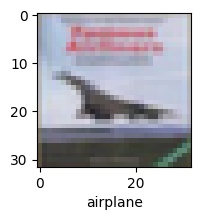

In [38]:
plot_sample(Features_test, Target_test,3)
Classes[Target_classes[3]]

`On Some Examples its not giving Correct Outcome but works fine on 3, 5, 8, 11 etc randomly checked`

'horse'

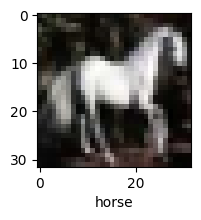

In [41]:
Input = 13
plot_sample(Features_test, Target_test,Input) 
Classes[Target_classes[Input]]